In [41]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
import os
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.interpolate import interp1d
from scipy.stats import linregress


# MYPATH="/Users/weugene/Dropbox/Aslan-Evgenii/media/pictures/Heat-transfer/"
MYPATH="../Heat_transfer_Polymerization/Verif/"

wl=2
MYSTYLE=[dict(color='royalblue', width=wl), dict(color='red', width=wl, dash='dot'),
         dict(color='aqua', width=wl, dash='dash'), dict(color='violet', width=wl, dash='dash'),
         dict(color='lightskyblue', width=wl, dash='dot'), dict(color='orange', width=wl, dash='dot'),
         dict(color='black', width=wl, dash='dash'), dict(color='darkmagenta', width=wl, dash='dash')]
def plot_graph(list_x, list_y, names, xtitle, ytitle, image_name, list_x_fill=[], list_y_fill=[], mode=[], \
			   dash=['solid', 'dot', 'dash', 'longdash'], \
			   colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
			   marker_size=15, xrange =[], yrange = [], \
			   marker_style = ['circle', 'triangle-up', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
			   width=1000, height=500, path='./', yanchor='center', y0_anchor=0.01, xanchor='left', x0_anchor=0.3, xlog=False, ylog=False):
	if mode == []:
		for i in range(len(list_x)):
			mode.append('lines+markers')


	while len(marker_style) < len(list_x):
		marker_style[:] = marker_style[:] + marker_style[:]
	figborderlinesize = 0.7
	legborderlinesize = 0.7
	yaxis = dict(
		tickfont = dict(
			family = 'Times New Roman',
			size = 20,
			color = 'black'
		),
		titlefont = dict(
			family = 'Times New Roman',
			size = 25,
			color = 'black'
		),
	)
	xaxis = dict(
		tickfont = dict(
			family = 'Times New Roman',
			size = 20,
			color = 'black'
		),
		titlefont = dict(
			family = 'Times New Roman',
			size = 25,
			color = 'black'
		)
	)

	axis_style = dict(showline=True, gridwidth=1, gridcolor='lightgrey', linewidth=figborderlinesize, linecolor='black', mirror=True, ticks='outside', tickfont = dict(family = 'Times New Roman', size = 20, color = 'black'))
	bg_style = {'plot_bgcolor': 'rgba(255, 255, 255, 1)', 'paper_bgcolor': 'rgba(255, 255, 255, 1)',}


	fig = go.Figure()
	k = len(list_x)
	n_fill = len(list_x_fill)
	if len(list_x_fill) == 2 and len(list_y_fill) == 2:
		fig.add_trace(go.Scatter(x=list_x_fill[1], y=list_y_fill[1], name=names[k+1], mode='lines', fillcolor='blueviolet', line_color='blueviolet', fill='tozeroy')) # fill to trace0 y
		fig.add_trace(go.Scatter(x=list_x_fill[0], y=list_y_fill[0], name=names[k], mode='lines', fillcolor='lightsteelblue',     line_color='indigo', fill='tozeroy')) # fill down to xaxis
	for i,x in enumerate(list_x):
		print('Plot curve number:', i)
		y = np.asarray(list_y[i])
		fig.add_trace(go.Scatter(x=x, y=y, name=names[i],
								 mode=mode[i],
								 marker=dict(
									 size=marker_size,
									 line=dict(width=1)
								 ),
								 marker_symbol=marker_style[i],
								 line=dict(width=2, dash=dash[i]),
								 textfont=dict(
									 family="Times New Roman",
									 size=18,
									 color="LightSeaGreen")
								 ))
		if colors != []:
			fig['data'][i + n_fill]['marker']['line']['color'] = colors[i]
			fig['data'][i + n_fill]['line']['color'] = colors[i]
	fig.update_layout(
		width = width,
		height = height,
		xaxis_title=xtitle,
		yaxis_title=ytitle,
		yaxis = yaxis,
		xaxis = xaxis,
		showlegend=True
	)
	fig.update_layout(bg_style)
	fig.update_xaxes(axis_style)
	fig.update_yaxes(axis_style)
	fig.update_layout(legend=dict(
		bgcolor="White",
		bordercolor="Black",
		borderwidth=figborderlinesize
	))
	fig.update_layout(font=dict(
		family="Times New Roman",
		size=20,
		color="Black"
	))
	fig.update_layout(
		autosize=False,
		margin=dict(
			l=0,
			r=0,
			b=0,
			t=0,
			pad=0.1
		),
		#     paper_bgcolor="LightSteelBlue",
	)
	fig.update_layout(legend=dict(
		yanchor=yanchor,
		y=y0_anchor,
		xanchor=xanchor,
		x=x0_anchor
	))
	if len(xrange) == 2:
		fig.update_xaxes(range=xrange)
	if len(yrange) == 2:
		fig.update_yaxes(range=yrange)
	if xlog:
		fig.update_xaxes(type="log")
	if ylog:
		fig.update_yaxes(type="log")
	fig.show()
	fn = os.path.join(path, image_name)
	print('Write image to file:', fn)
	fig.write_image(str(Path(fn)), engine="kaleido")
	print("Successfully generated:", fn)

        # With Modified Chorin's projection
# graphs('/Users/weugene/basilisk/work/Verification_decaying_vortex/convergence.txt', ['6', '7', '8', '9'], ['-3', '-4', '-5', '-6'], whole=False, prefix="Modified_Chorin_" )
#result no convergence with grid refinement. Pressure field looks bad => bad velocity field

# for lev in levs:
#     if lev==9:
#         df = data_b[8]
#         f8T = interp1d(df[df['t']>tmax]['t'], df[df['t']>tmax]['T'])
#         f8alpha = interp1d(df[df['t']>tmax]['t'], df[df['t']>tmax]['alpha'])
        
#         df = data_b[10]
#         f10T = interp1d(df[df['t']>tmax]['t'], df[df['t']>tmax]['T'])
#         f10alpha = interp1d(df[df['t']>tmax]['t'], df[df['t']>tmax]['alpha'])
        
#         x = np.linspace(tmax+0.01, 23, 1000)

#         T9 = 0.5*(f8T(x) + f10T(x))
#         alpha9 = 0.5*(f8alpha(x) + f10alpha(x))

#         data_b[lev] = pd.concat([data_b[lev], pd.DataFrame(data={'t':x, 'T':T9, 'alpha': alpha9})])

# Heated Cylinder

In [75]:
data_w = pd.read_csv("../Heat_transfer_Polymerization/Verif/cylinder_polymerization_wolfram_r=1.2.csv")
# dirn = 'cylinder_C1_NS'
# dirn= 'cylinder_C1_NS_less_eps'
dirn= 'cylinder_A=0'
relativeErr = False
data_b = {}
levs = [ 8, 9, 10, 11]
tfix = [0.1, 0.2, 0.3]
data_w_tfix = {}
data_b_tfix = {}
for lev in levs:
    print('lev', lev)
    data_b[lev] = pd.read_csv(f"../Heat_transfer_Polymerization/Verif/{dirn}/{dirn}_Jmax=" + str(lev) + "/cylinder_polymerization_basilisk_x=1.2.csv")
    data_b[lev].columns = ['t', 'T', 'alpha', 'u', 'mu']
    data_b_tfix[lev] = {}
    data_w_tfix[lev] = {}
    for t in tfix:
        data_b_tfix[lev][t] = pd.read_csv(f"../Heat_transfer_Polymerization/Verif/{dirn}/{dirn}_Jmax={lev}/cylinder_polymerization_basilisk_tfix={t}.csv")
        data_b_tfix[lev][t].columns = ['x', 'T', 'alpha', 'u', 'mu']


for t in tfix:
    try:
        data_w_tfix[t] = pd.read_csv(f"../Heat_transfer_Polymerization/Verif/cylinder_polymerization_wolfram_tfix={t}.csv")
        data_w_tfix[t].columns = ['x', 'T', 'alpha']
    except:
        print(f'failed to read for t={t}')
        pass

if relativeErr:
    data_etal = data_b[11]
else:
    data_etal = data_w
    
tmax = 10


lev 8
lev 9
lev 10
lev 11


Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


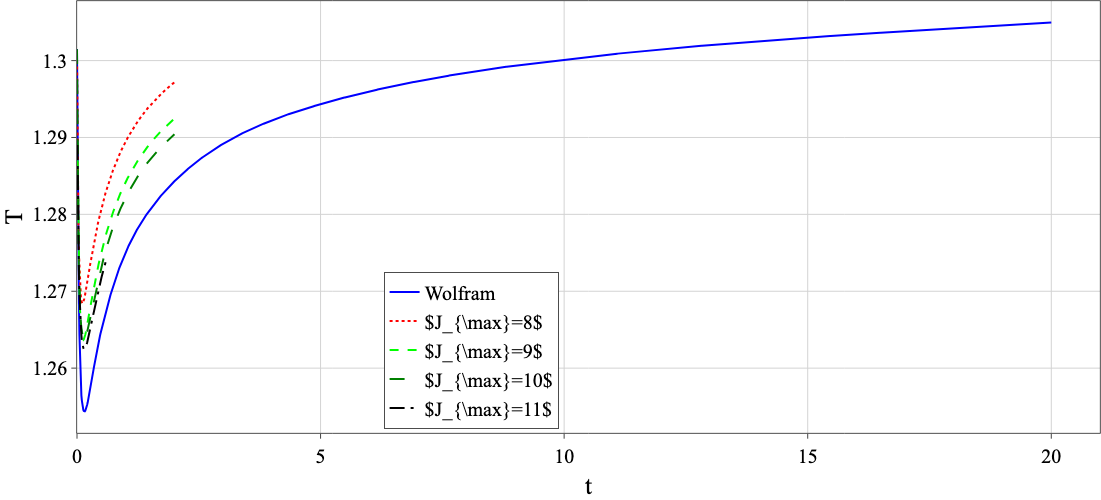

Write image to file: ../Heat_transfer_Polymerization/Verif/T_t.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/T_t.pdf
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


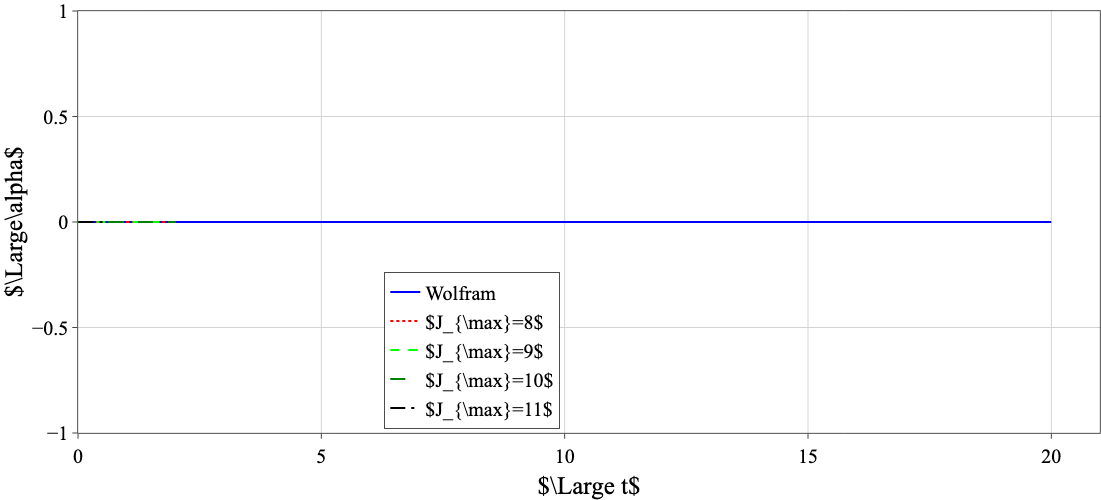

Write image to file: ../Heat_transfer_Polymerization/Verif/alpha_t.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/alpha_t.pdf


In [76]:
list_x = [data_etal['t']]
list_y = [data_etal['T']]
names = ['Wolfram']
for lev in levs:
    list_x.append(data_b[lev]['t'])
    list_y.append(data_b[lev]['T'])
    names.append(r'$J_{\max}=' + str(lev) + '$')

plot_graph(list_x, list_y, names, xtitle='t', ytitle='T', image_name='T_t.pdf', list_x_fill=[], list_y_fill=[], mode=['lines', 'lines', 'lines', 'lines', 'lines'], \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot'], \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
           marker_size=2, xrange =[0, 21], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)

list_x = [data_etal['t']]
list_y = [data_etal['alpha']]
for lev in levs:
    list_x.append(data_b[lev]['t'])
    list_y.append(data_b[lev]['alpha'])
    
plot_graph(list_x, list_y, names, xtitle=r'$\Large t$', ytitle=r'$\Large\alpha$', image_name='alpha_t.pdf', list_x_fill=[], list_y_fill=[], mode=['lines', 'lines', 'lines', 'lines', 'lines'], \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot'], \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
           marker_size=2, xrange =[0, 21], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)


Slope: 0.5803399885773939
Plot curve number: 0


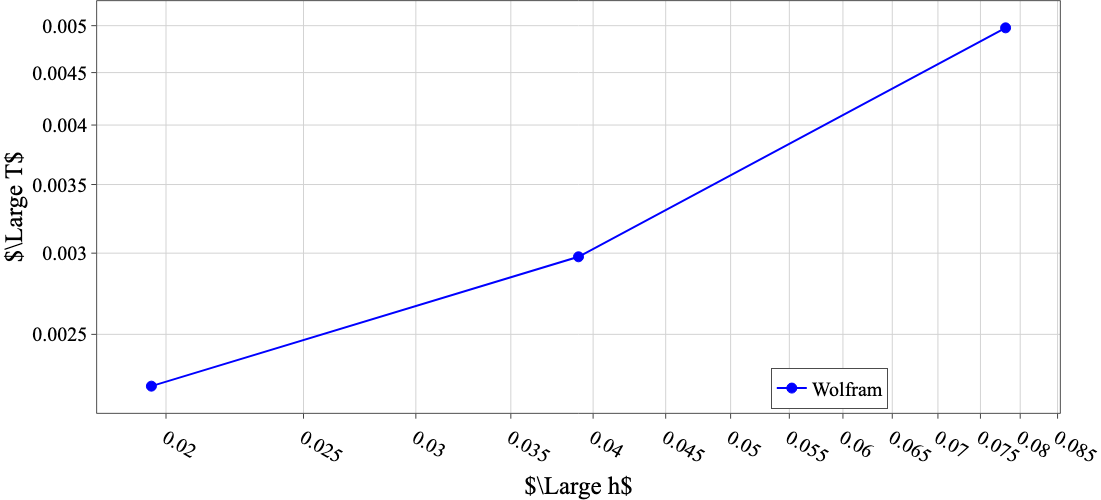

Write image to file: ../Heat_transfer_Polymerization/Verif/Cylionder_Err_T_vs_h.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/Cylionder_Err_T_vs_h.pdf


In [34]:
tfix = 1.5
tol = 0.005
list_x = [] #data_w['t']
list_y = [] #data_w['alpha']

for lev in [ 8,9,10]:
    df = data_b[lev]
    list_x.append(20/2**lev)
    list_y.append(abs(df['T'][(df['t'] - tfix).abs()< tol].values[0] - data_etal['T'][data_etal['t'] == tfix].values[0]))

    
slope, intercept, r_value, p_value, std_err = linregress(np.log(list_x), np.log(list_y))
print('Slope:', slope)
plot_graph([list_x], [list_y], names, xtitle=r'$\Large h$', ytitle=r'$\Large T$', image_name='Cylionder_Err_T_vs_h.pdf', list_x_fill=[], list_y_fill=[], mode=['markers+lines', 'markers+lines', 'lines', 'lines', 'lines', 'lines'], \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot'], \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
           marker_size=10, xrange =[], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.7, xlog=True, ylog=True)


Slope: 0.39106327118101664
Plot curve number: 0


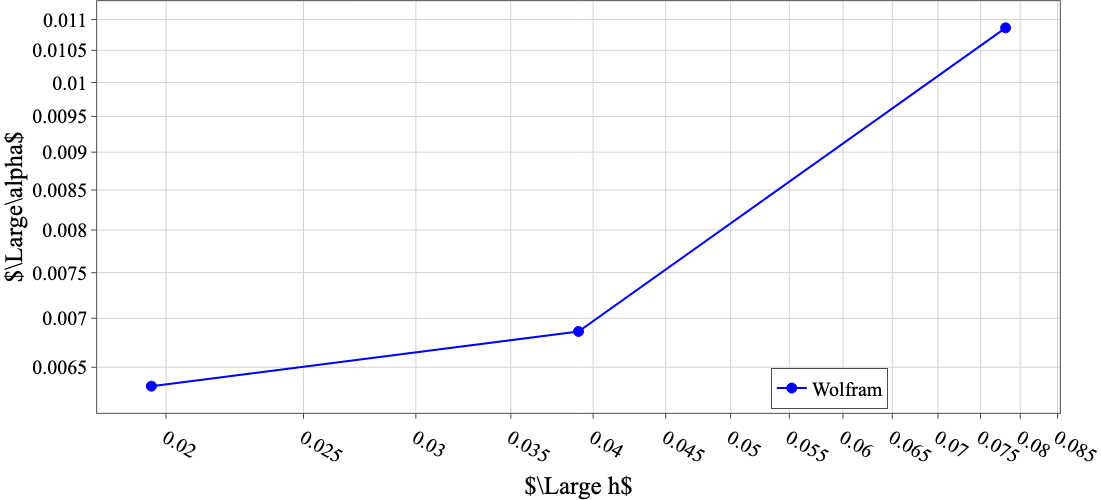

Write image to file: ../Heat_transfer_Polymerization/Verif/Cylinder_Err_alpha_vs_h.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/Cylinder_Err_alpha_vs_h.pdf


In [36]:
tfix = 1.5
tol = 0.005
list_x = [] #data_w['t']
list_y = [] #data_w['alpha']
for lev in [8,9, 10]:
    try:
        df = data_b[lev]
        list_y.append(abs(df['alpha'][(df['t'] - tfix).abs()< tol].values[0] - data_etal['alpha'][data_etal['t'] == tfix].values[0]))
        list_x.append(20/2**lev)
    except:
        print("Can\'t read lev=", lev)

slope, intercept, r_value, p_value, std_err = linregress(np.log(list_x), np.log(list_y))
print('Slope:', slope)

plot_graph([list_x], [list_y], names, xtitle=r'$\Large h$', ytitle=r'$\Large\alpha$', image_name='Cylinder_Err_alpha_vs_h.pdf', list_x_fill=[], list_y_fill=[], mode=['markers+lines', 'markers+lines', 'lines', 'lines', 'lines', 'lines'], \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot'], \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
           marker_size=10, xrange =[], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.7, xlog=True, ylog=True)


tfix=0.2
lev=8
lev=9
lev=10
lev=11
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


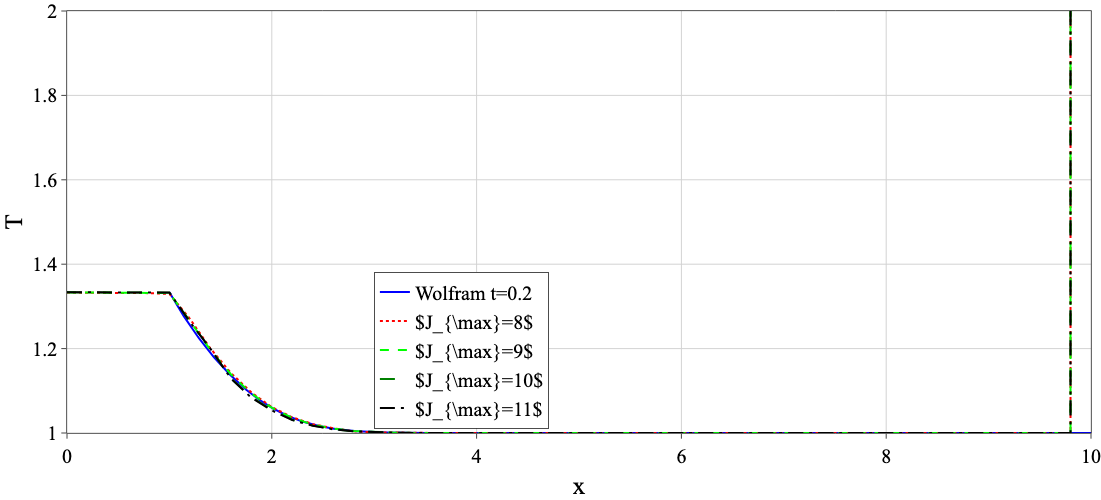

Write image to file: ../Heat_transfer_Polymerization/Verif/Couette_T_x_t=0.2.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/Couette_T_x_t=0.2.pdf
tfix=0.2
lev=8
lev=9
lev=10
lev=11
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


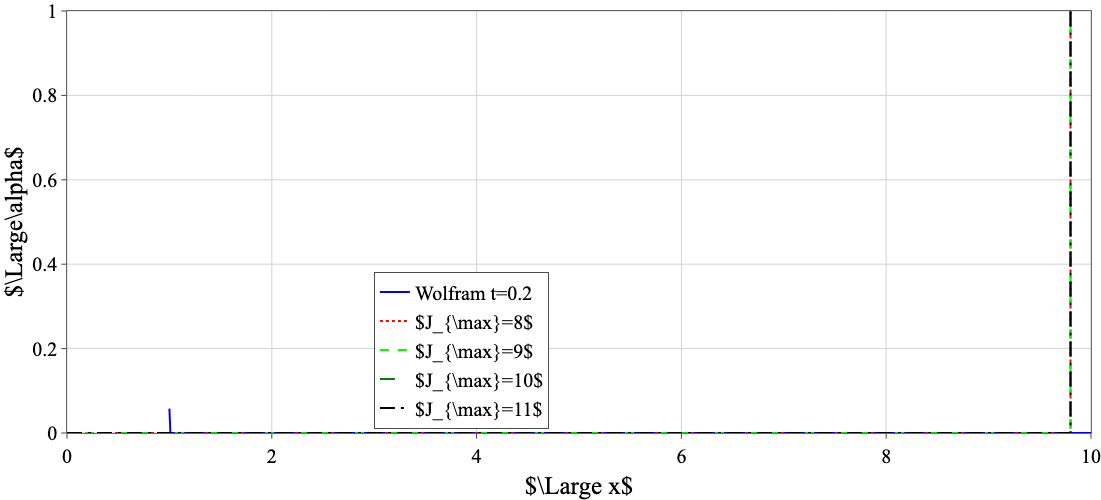

Write image to file: ../Heat_transfer_Polymerization/Verif/Couette_alpha_x_t=0.2.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/Couette_alpha_x_t=0.2.pdf


In [72]:
tfix = [0.2]
tfixsn = "_".join(map(str, tfix))
list_x = []
list_y = []

names = []
for tf in tfix:
    print(f"tfix={tf}")
    list_x.append(data_w_tfix[tf]['x'])
    list_y.append(data_w_tfix[tf]['T'])
    names.append(f'Wolfram t={tf}')
    for lev in levs:
        print(f"lev={lev}")
        list_x.append(data_b_tfix[lev][tf]['x'])
        list_y.append(data_b_tfix[lev][tf]['T'])
        names.append(r'$J_{\max}=' + str(lev) + "$")


plot_graph(list_x, list_y, names, xtitle='x', ytitle='T', image_name=f'Couette_T_x_t={tfixsn}.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, xrange =[0, 10], yrange = [1,2], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)

list_x = []
list_y = []
for tf in tfix:
    print(f"tfix={tf}")
    list_x.append(data_w_tfix[tf]['x'])
    list_y.append(data_w_tfix[tf]['alpha'])
    for lev in levs:
        print(f"lev={lev}")
        list_x.append(data_b_tfix[lev][tf]['x'])
        list_y.append(data_b_tfix[lev][tf]['alpha'])
    
plot_graph(list_x, list_y, names, xtitle=r'$\Large x$', ytitle=r'$\Large\alpha$', image_name=f'Couette_alpha_x_t={tfixsn}.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, xrange =[0, 10], yrange = [0,1], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)


In [333]:

# list_x = [data_w['t']]
# list_y = [data_w['T']]
# names = ['Wolfram']
# for lev in levs:
#     list_x.append(data_b[lev]['t'])
#     list_y.append(data_b[lev]['T'])
#     names.append(r'$J_{\max}=' + str(lev) + '$')


# plot_graph(list_x, list_y, names, xtitle='t', ytitle='T', image_name='cylinder_T_tE.pdf', list_x_fill=[], list_y_fill=[], mode=['lines', 'lines', 'lines', 'lines', 'lines'], \
#            dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot'], \
#            colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
#            marker_size=2, xrange =[0,21], yrange = [], \
#            marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
#            width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)

# list_x = [data_w['t']]
# list_y = [data_w['alpha']]
# for lev in levs:
#     list_x.append(data_b[lev]['t'])
#     list_y.append(data_b[lev]['alpha'])
    
# plot_graph(list_x, list_y, names, xtitle=r'$\Large t$', ytitle=r'$\Large\alpha$', image_name='cylinder_alpha_tE.pdf', list_x_fill=[], list_y_fill=[], mode=['lines', 'lines', 'lines', 'lines', 'lines'], \
#            dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot'], \
#            colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
#            marker_size=2, xrange =[0,21], yrange = [], \
#            marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
#            width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)
